Задание 2

In [179]:
import pandas as pd

frame = pd.read_csv('owid-covid-data.csv', usecols = ['iso_code', 'date', 'total_cases'])
frame = frame[frame.iso_code == 'USA']
frame = frame[frame.total_cases > 0]
frame = frame.reset_index()

frame[:3]


,index,iso_code,date,total_cases
0,11519,USA,2020-01-21,1
1,11520,USA,2020-01-22,1
2,11521,USA,2020-01-23,1


Задание 3

<function matplotlib.pyplot.show(*args, **kw)>

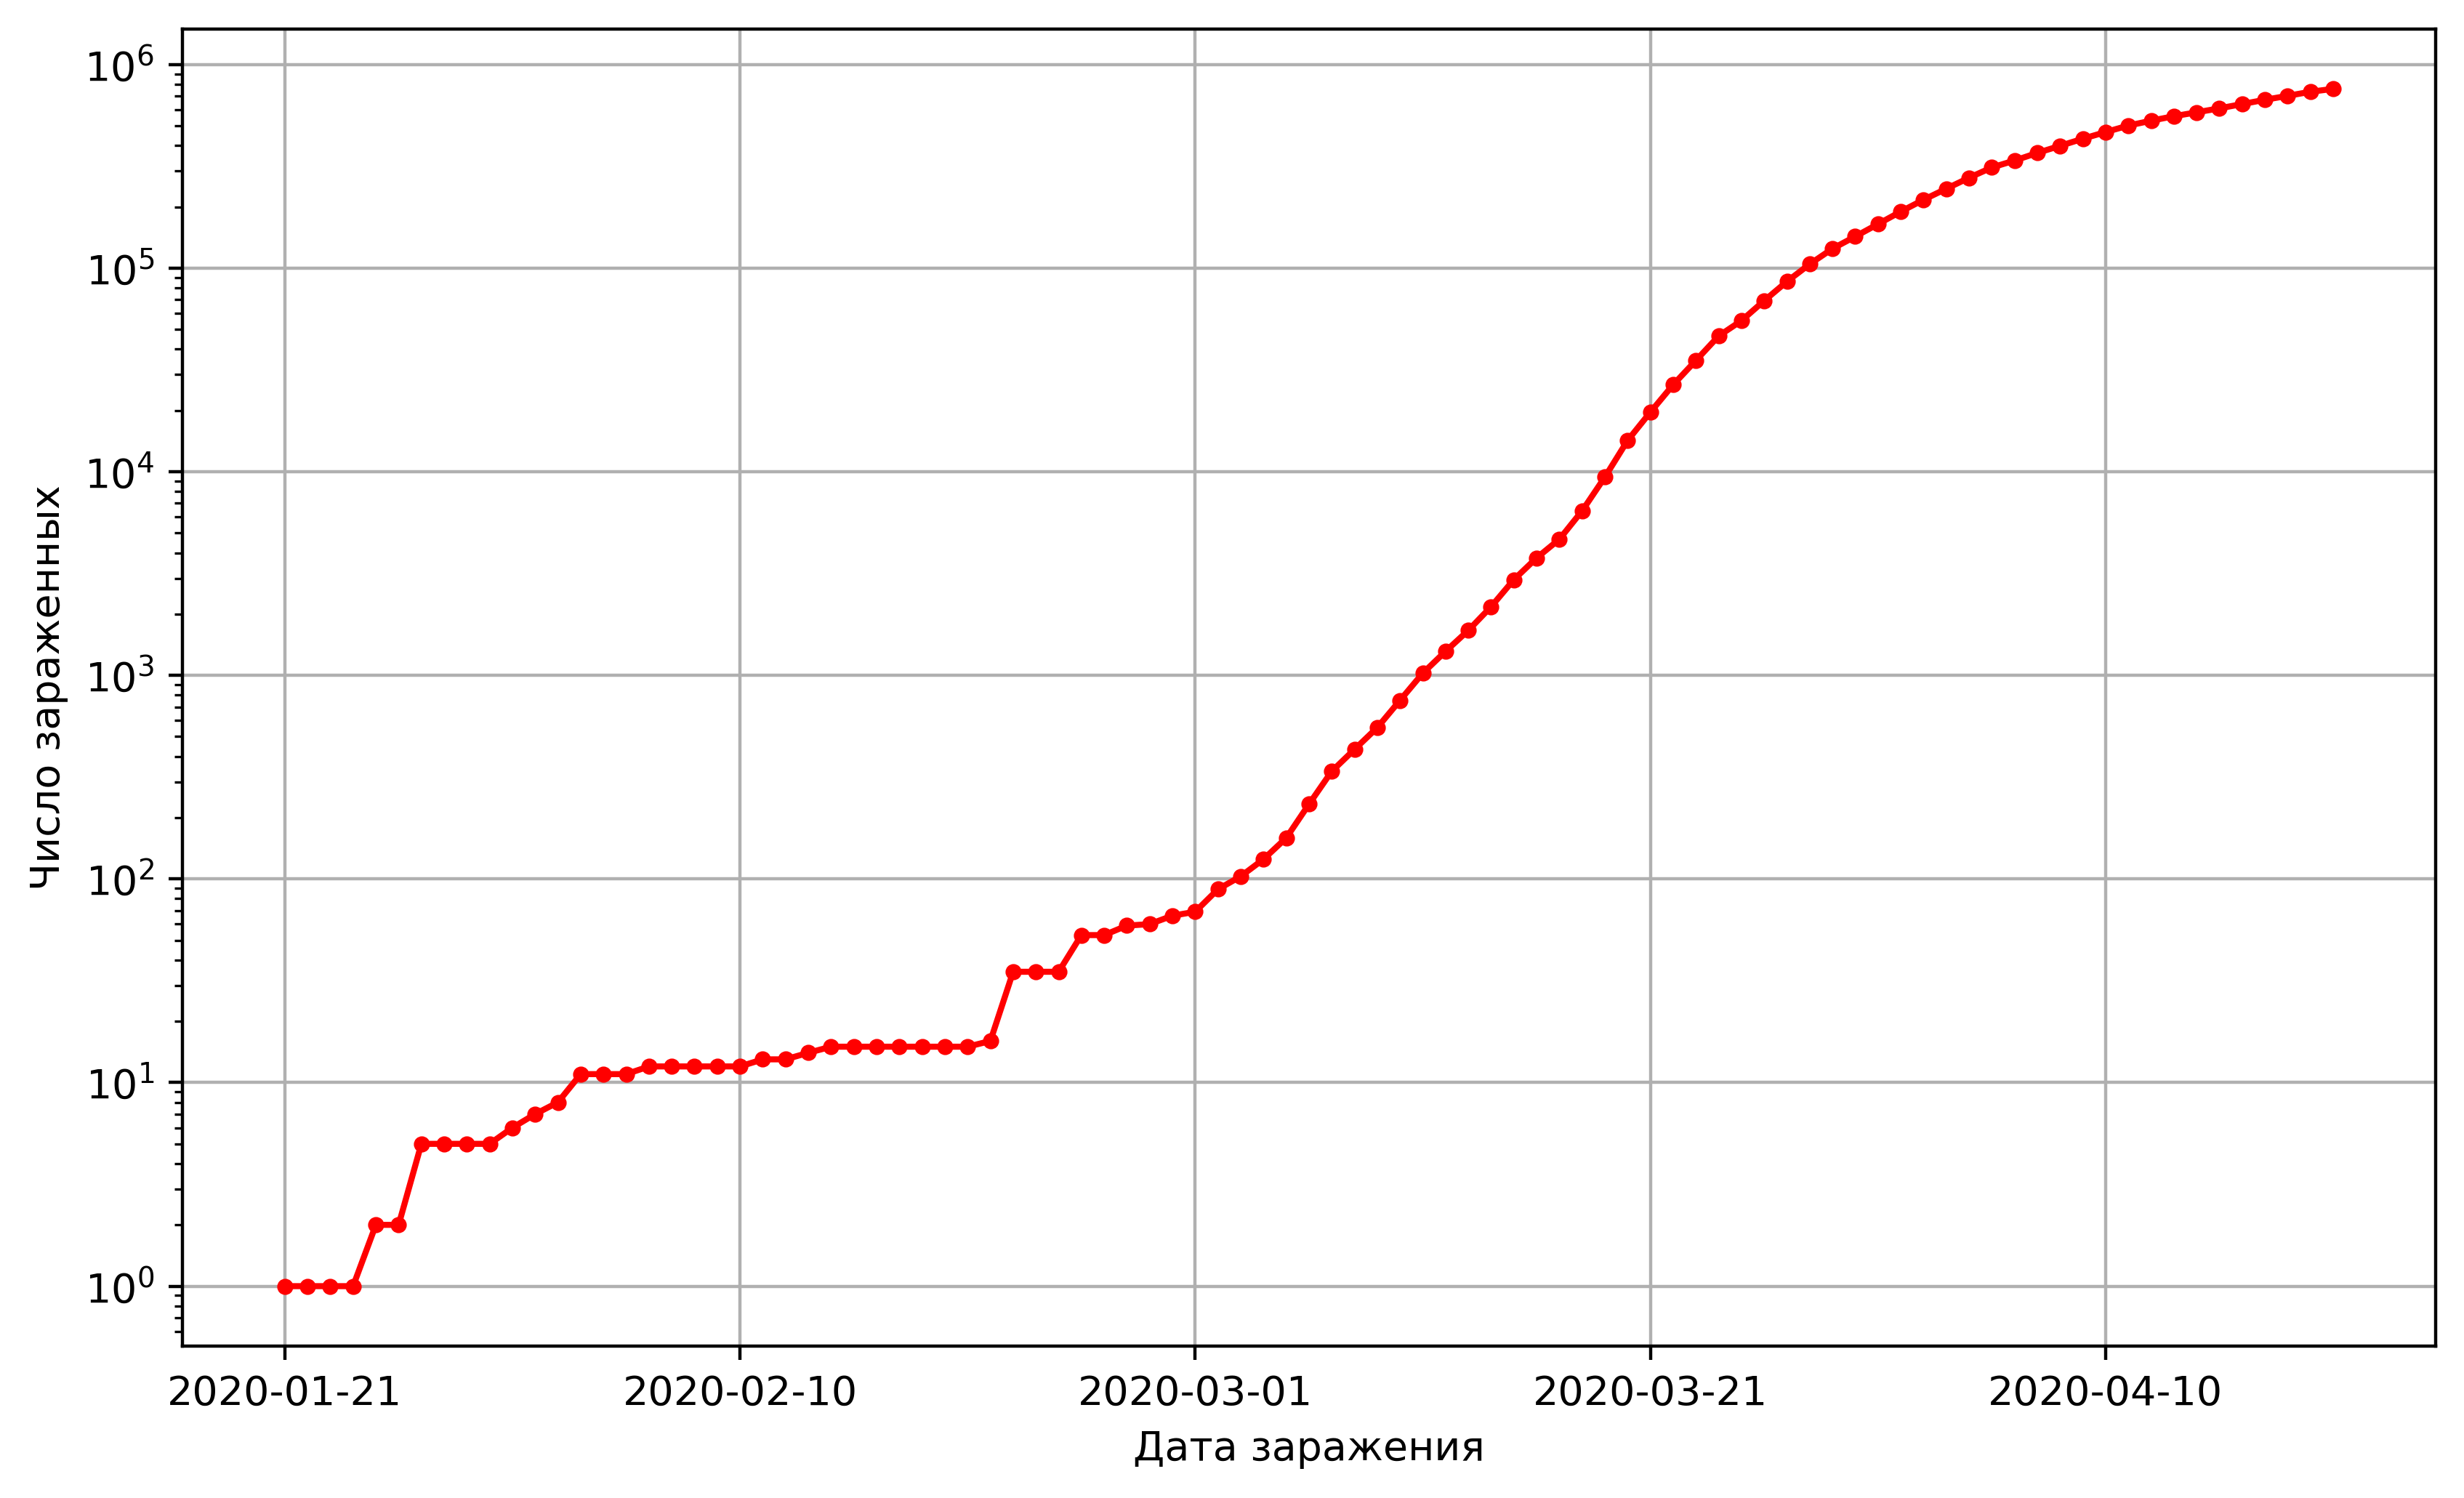

In [180]:
import matplotlib.pyplot as plot
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)
frame.plot(x = 'date', y = 'total_cases', ax = axes, legend = False, logy = True, style = 'r.-')
axes.set_xlabel('Дата заражения')
axes.set_ylabel('Число зараженных')
axes.grid()
plot.show


0.282955680223545


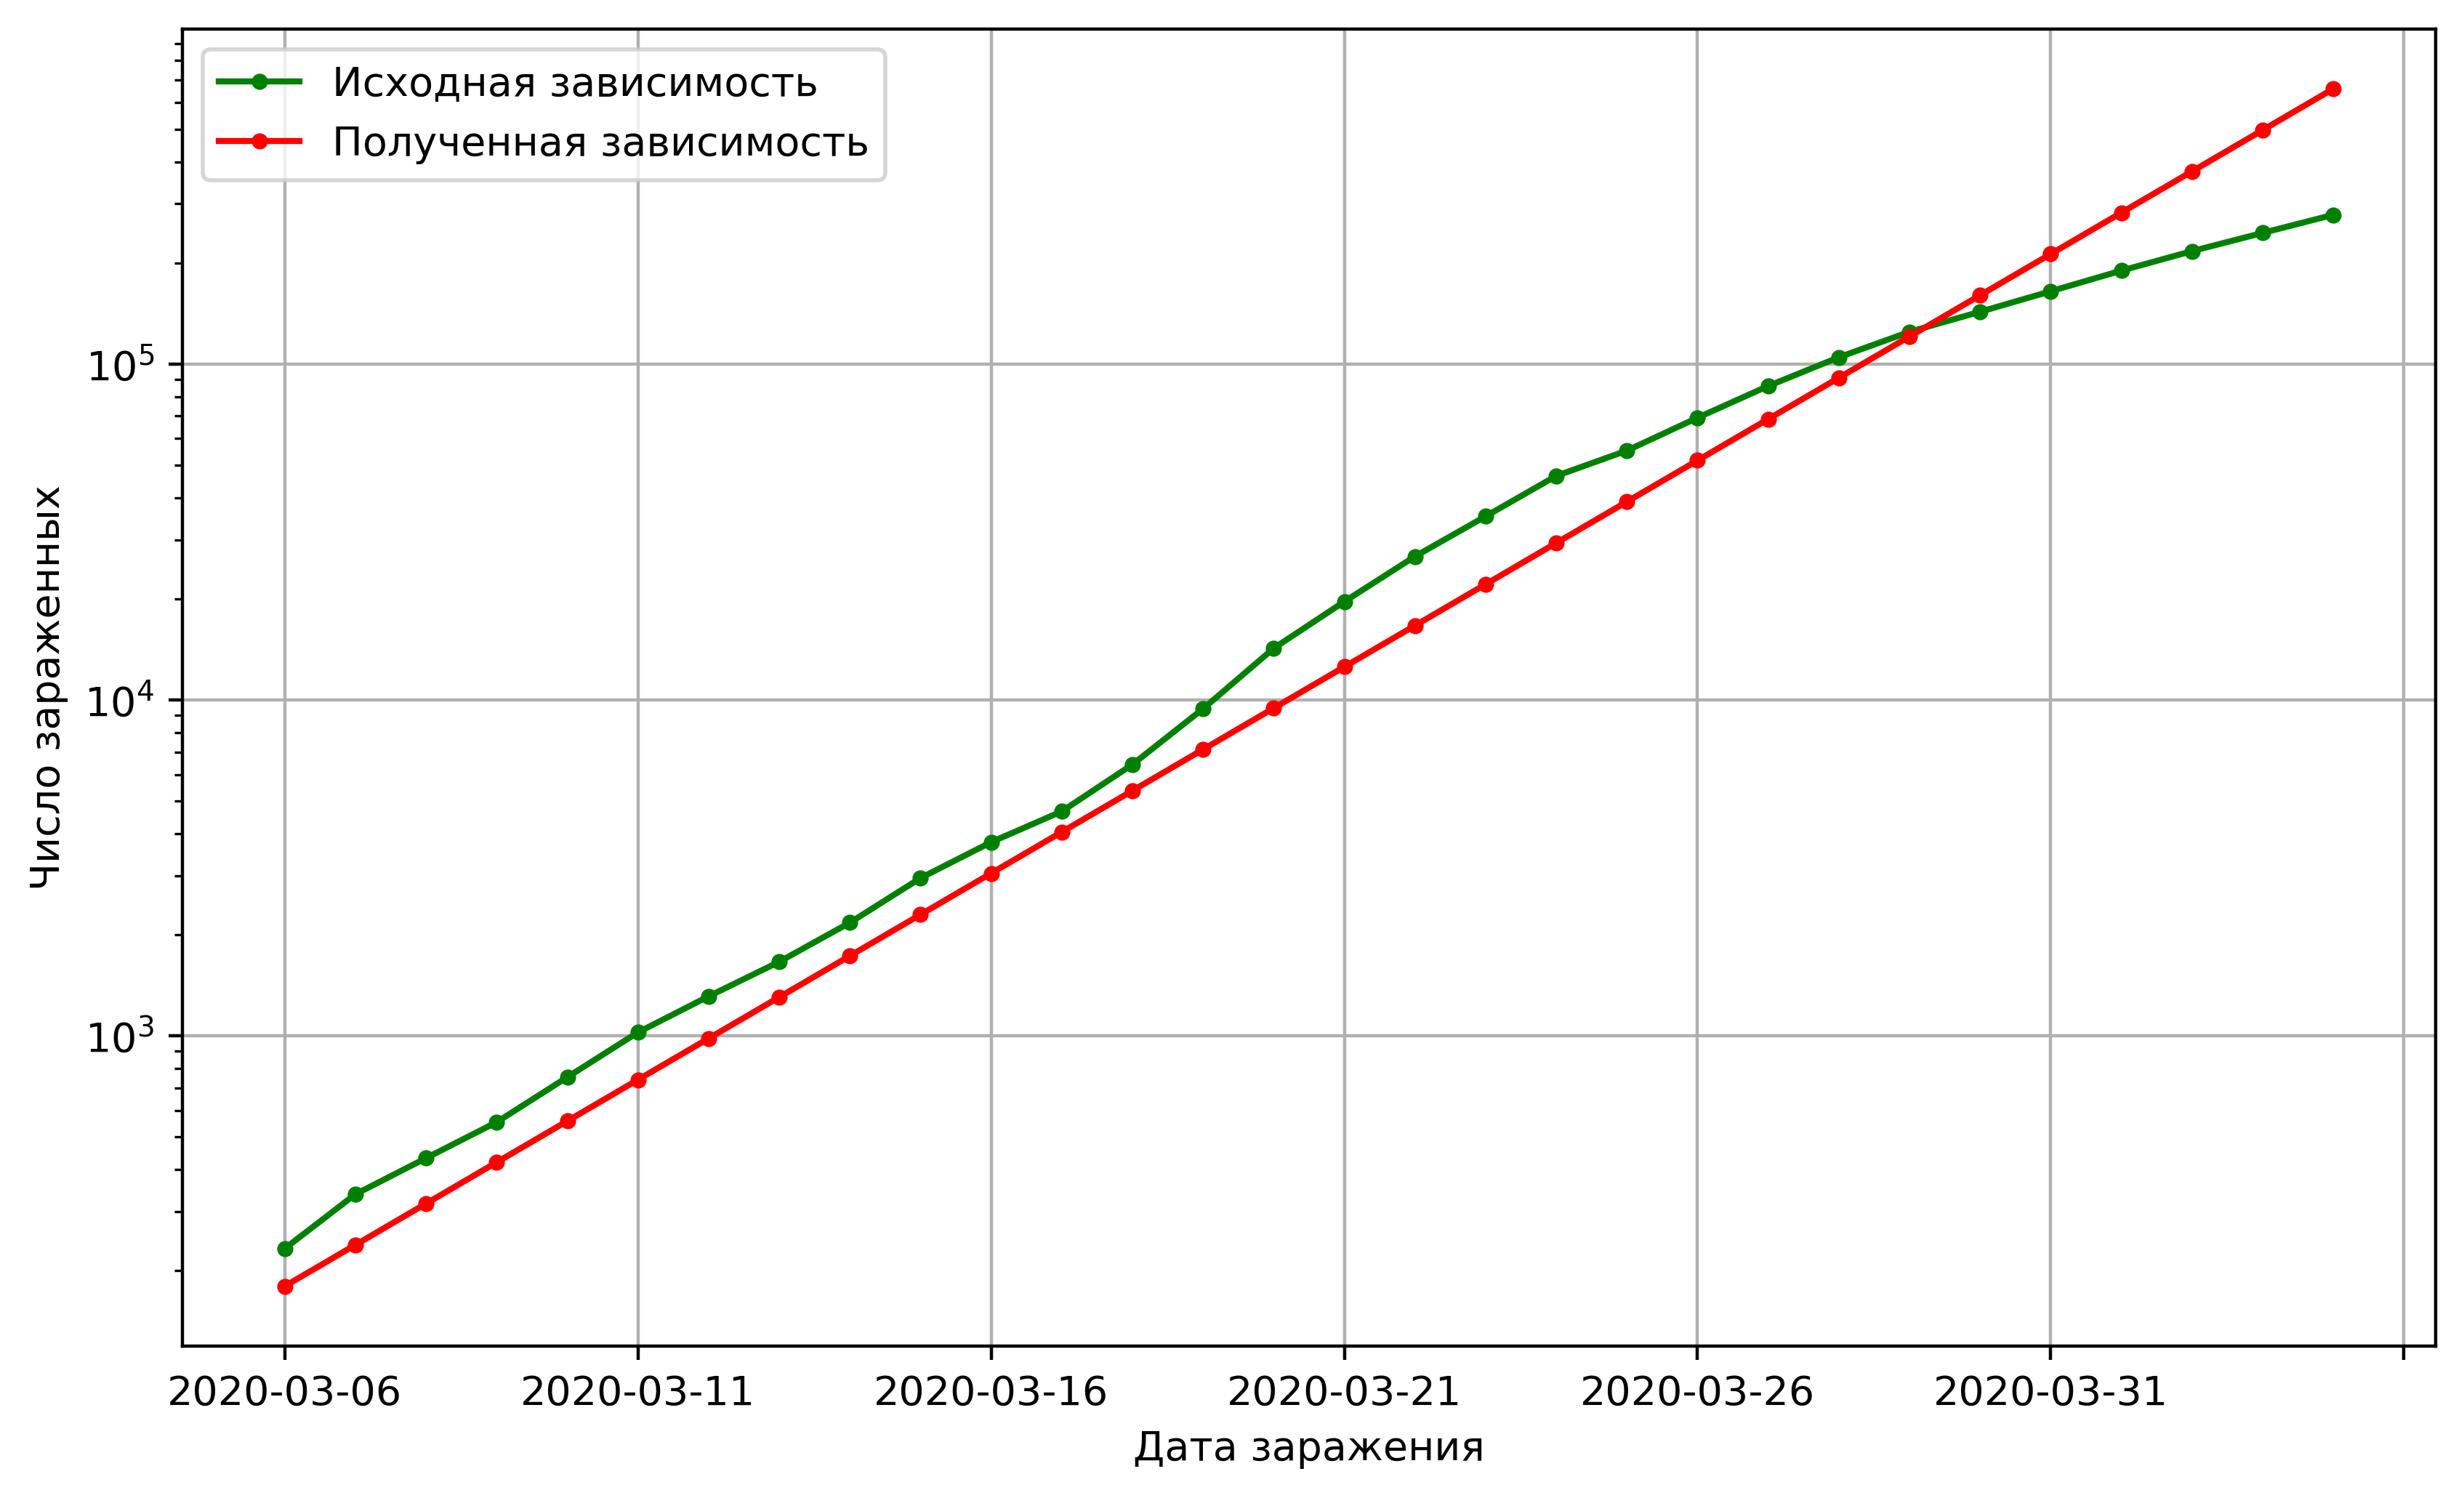

In [181]:
import matplotlib.pyplot as plt
import numpy as np
exp_days = 30
X = np.arange(0, exp_days, 1)
I0 = 180
frame = frame[frame.total_cases > I0].reset_index()
Y = np.log(frame.total_cases[:exp_days] / I0)
Xi = (1 / (X.T.dot(X)) * (X.T)).dot(Y)
print(Xi)
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)
frame[:exp_days].plot(x = 'date', y = 'total_cases', ax = axes, logy = True, style = 'g.-')
plt.plot(X, I0 * np.exp(Xi * X), 'r.-')
axes.set_xlabel('Дата заражения')
axes.set_ylabel('Число зараженных')
axes.legend(['Исходная зависимость', 'Полученная зависимость'], loc='best')
axes.grid()
plt.show()


Задание 4

241.04009647661036
604213.4057179153


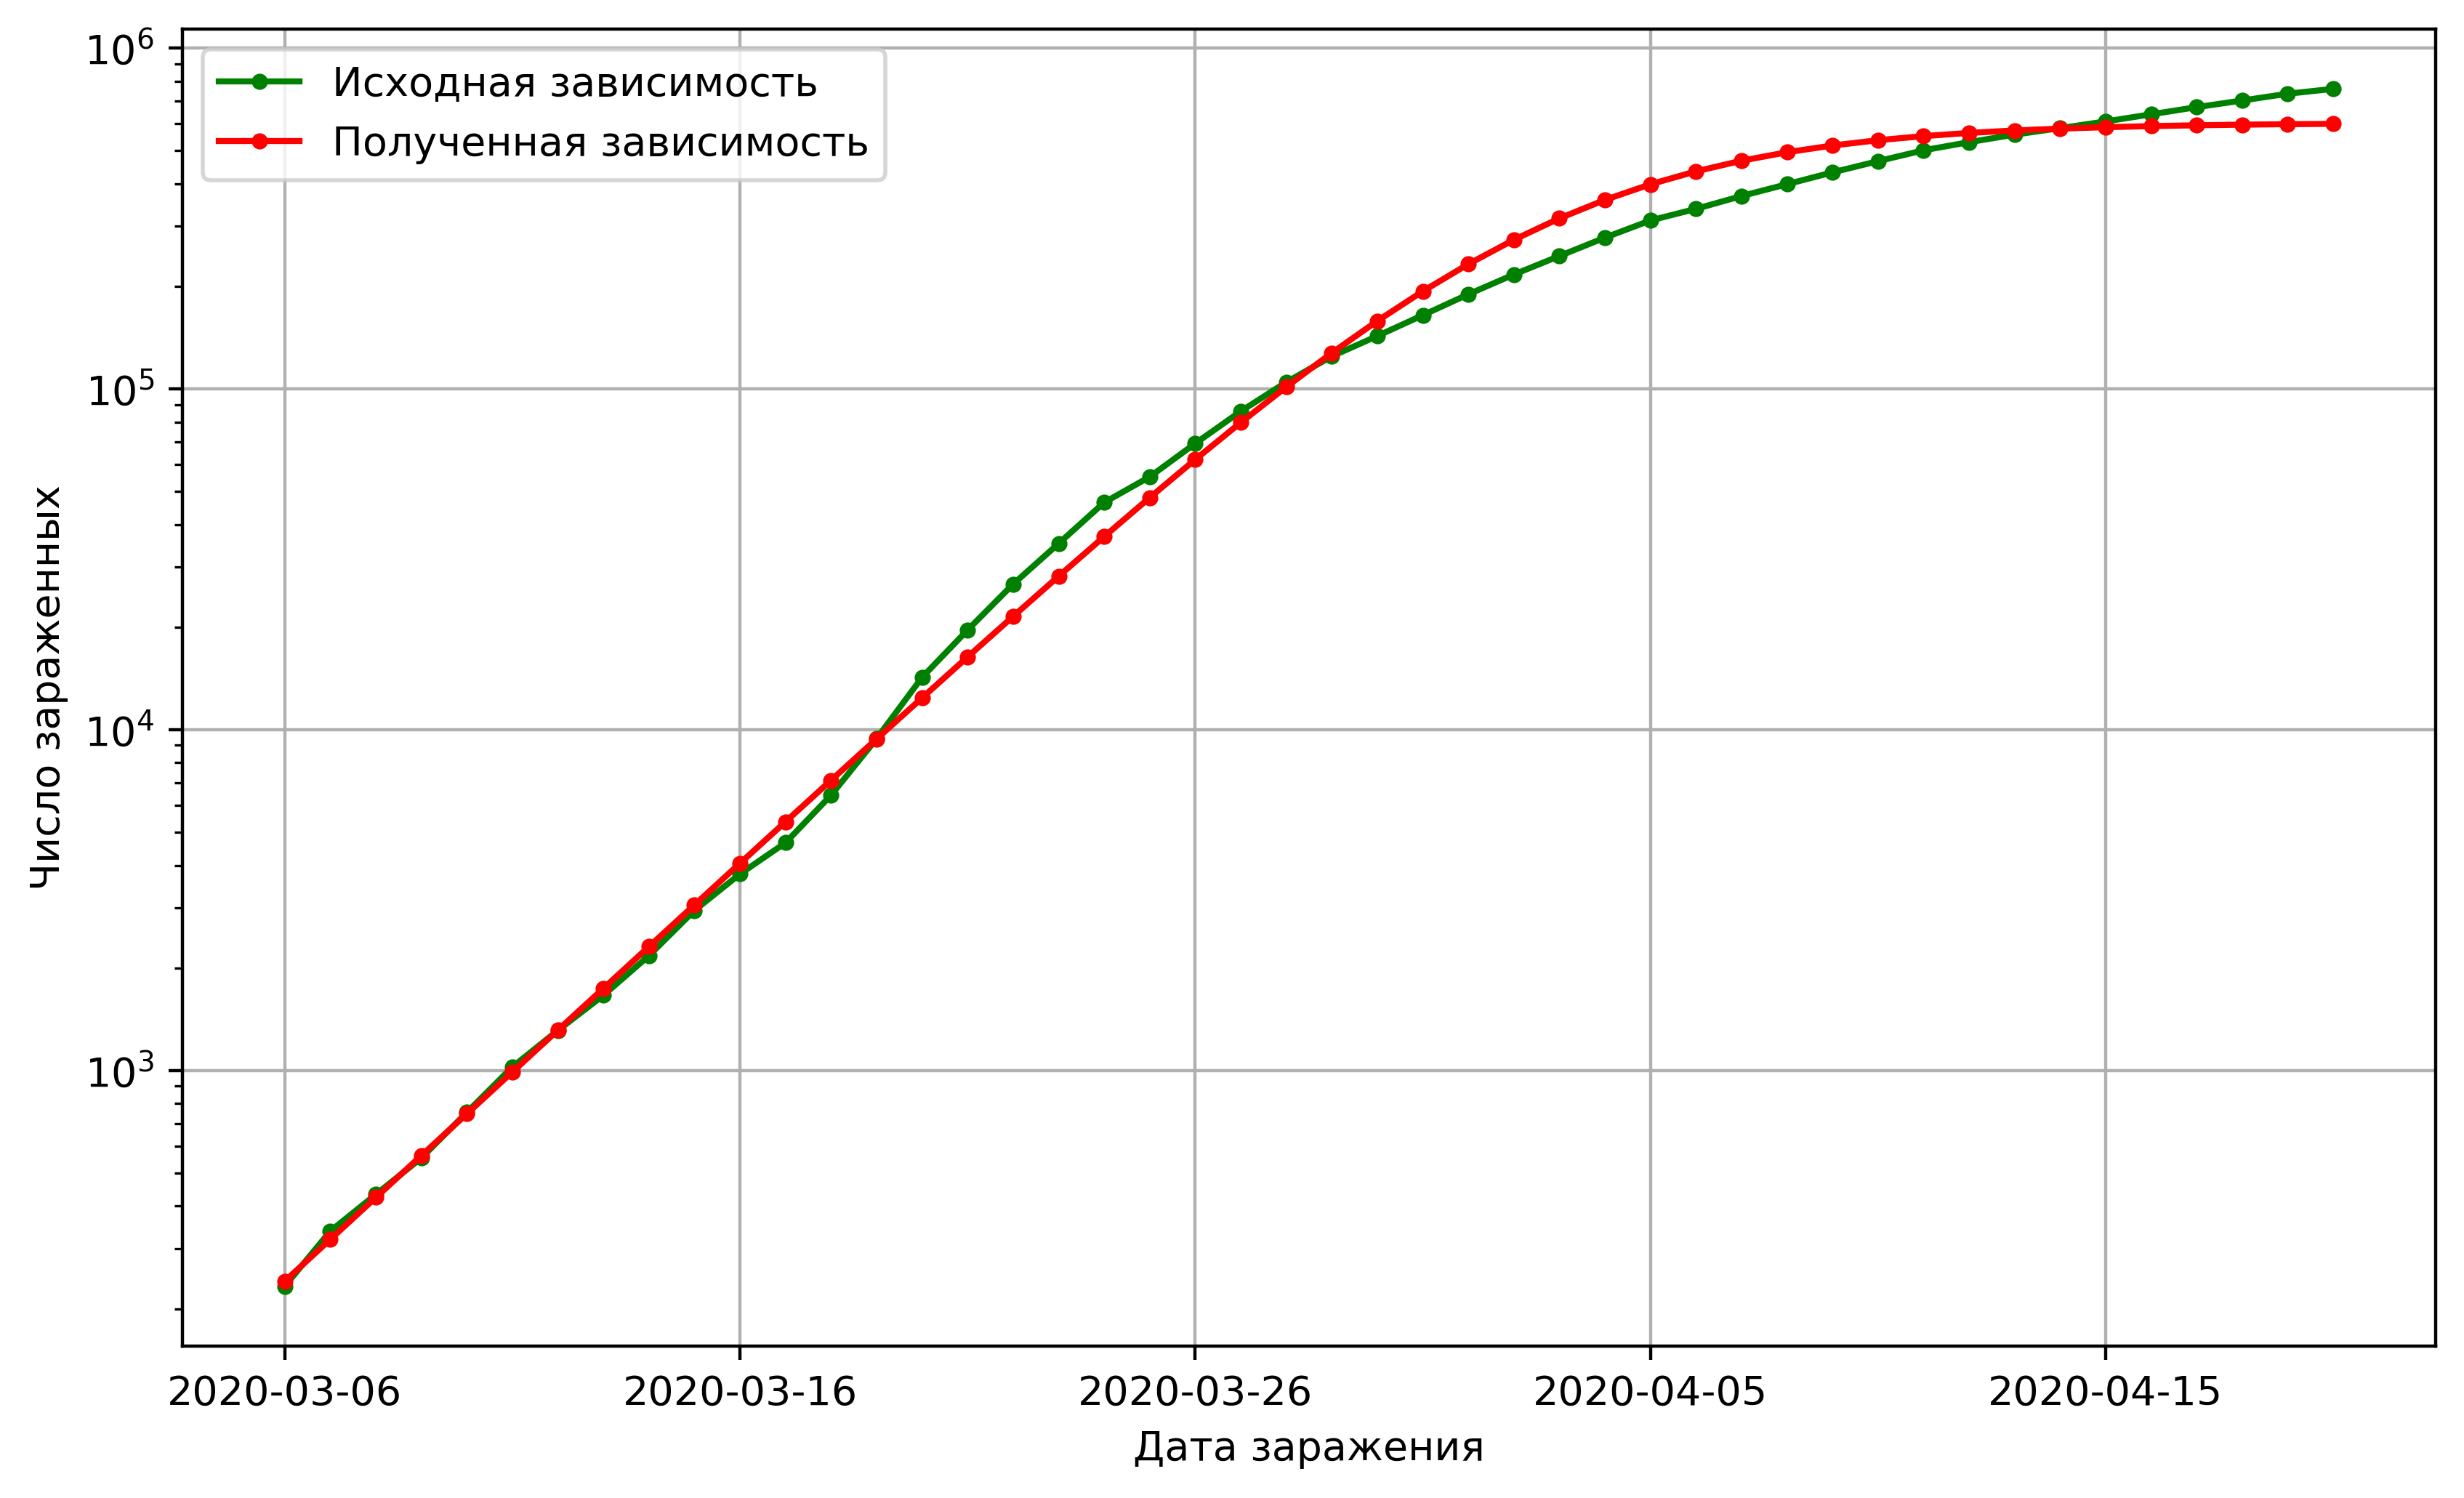

In [182]:
t = np.arange(0, frame.total_cases.size, 1)
X = np.ones((frame.total_cases.size, 2))
for i in range(len(X)):
    X[i][1] = np.exp(-Xi * t[i])
Y = 1/frame.total_cases
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
I_inf = 1/a[0]
I0 = 1/(a[0] + a[1])
print(I0)
print(I_inf)
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)
frame.plot(x = 'date', y = 'total_cases', ax = axes, logy = True, style = 'g.-')
plt.plot(t, I_inf/(1+(I_inf/I0-1)*np.exp(-Xi * t)), 'r.-')
axes.set_xlabel('Дата заражения')
axes.set_ylabel('Число зараженных')
axes.legend(['Исходная зависимость', 'Полученная зависимость'], loc='best')
axes.grid()
plt.show()


Задание 5

In [183]:
import math

L_inf = np.max(list(map(abs, [(I_inf/(1+(I_inf/I0-1)*np.exp(-Xi * i)) - frame.total_cases[i]) for i in t])))
print(L_inf)

L2 = math.sqrt(1/frame.total_cases.size * np.sum([((I_inf/(1+(I_inf/I0-1)*np.exp(-Xi * i)) - \
                                                    frame.total_cases[i])**2) for i in t]))
print(L2)

159910.12424398074
54161.23775816565


     fun: 45508.816270301606
     jac: array([176.01923901,   0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 282
     nit: 8
 success: True
       x: array([1.91040096e+02, 6.28284363e+05])


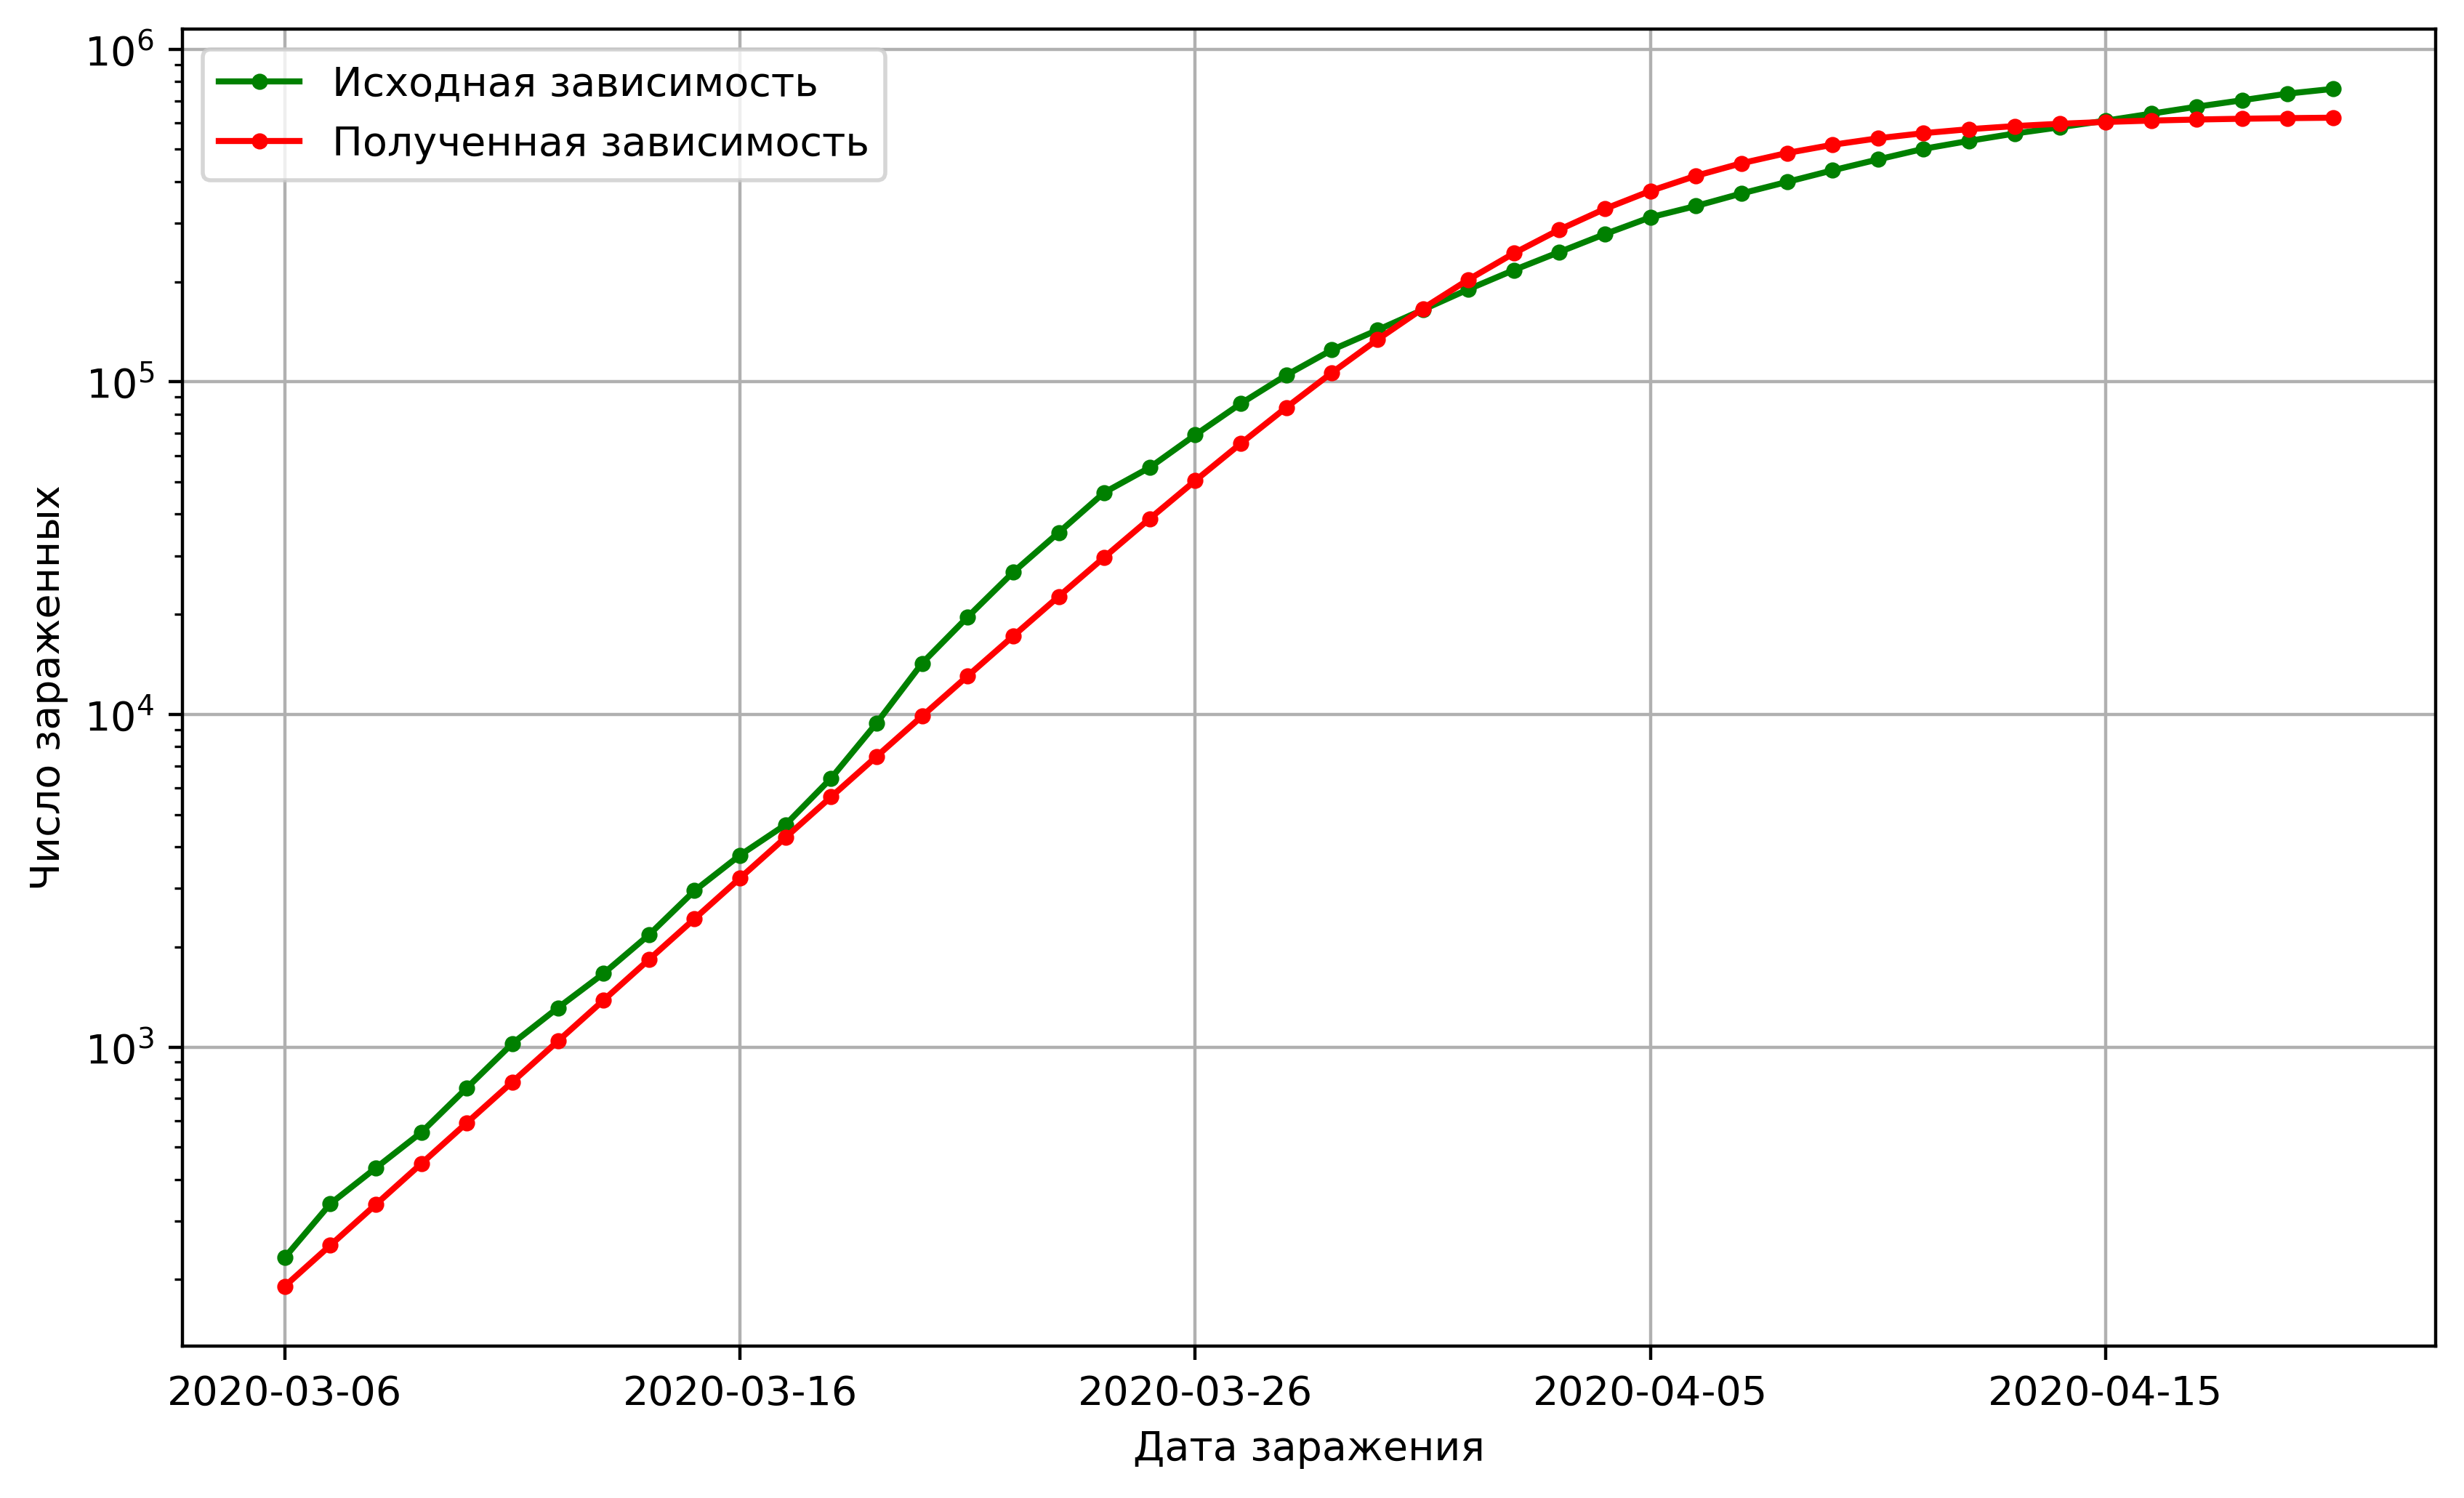

In [188]:
from scipy.optimize import differential_evolution


def err(args):
    I0, I_inf = args
    return math.sqrt(1/frame.total_cases.size * np.sum([((I_inf/(1+(I_inf/I0-1)*np.exp(-Xi * i)) - \
                                                    frame.total_cases[i])**2) for i in t]))

sol = differential_evolution(err, [[I0 - 50, I0 + 1], [I_inf - 5000, I_inf + 60000]])
print(sol)
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)
frame.plot(x = 'date', y = 'total_cases', ax = axes, logy = True, style = 'g.-')
plt.plot(t, sol.x[1]/(1+(sol.x[1]/sol.x[0]-1)*np.exp(-Xi * t)), 'r.-')
axes.set_xlabel('Дата заражения')
axes.set_ylabel('Число зараженных')
axes.legend(['Исходная зависимость', 'Полученная зависимость'], loc='best')
axes.grid()
plt.show()


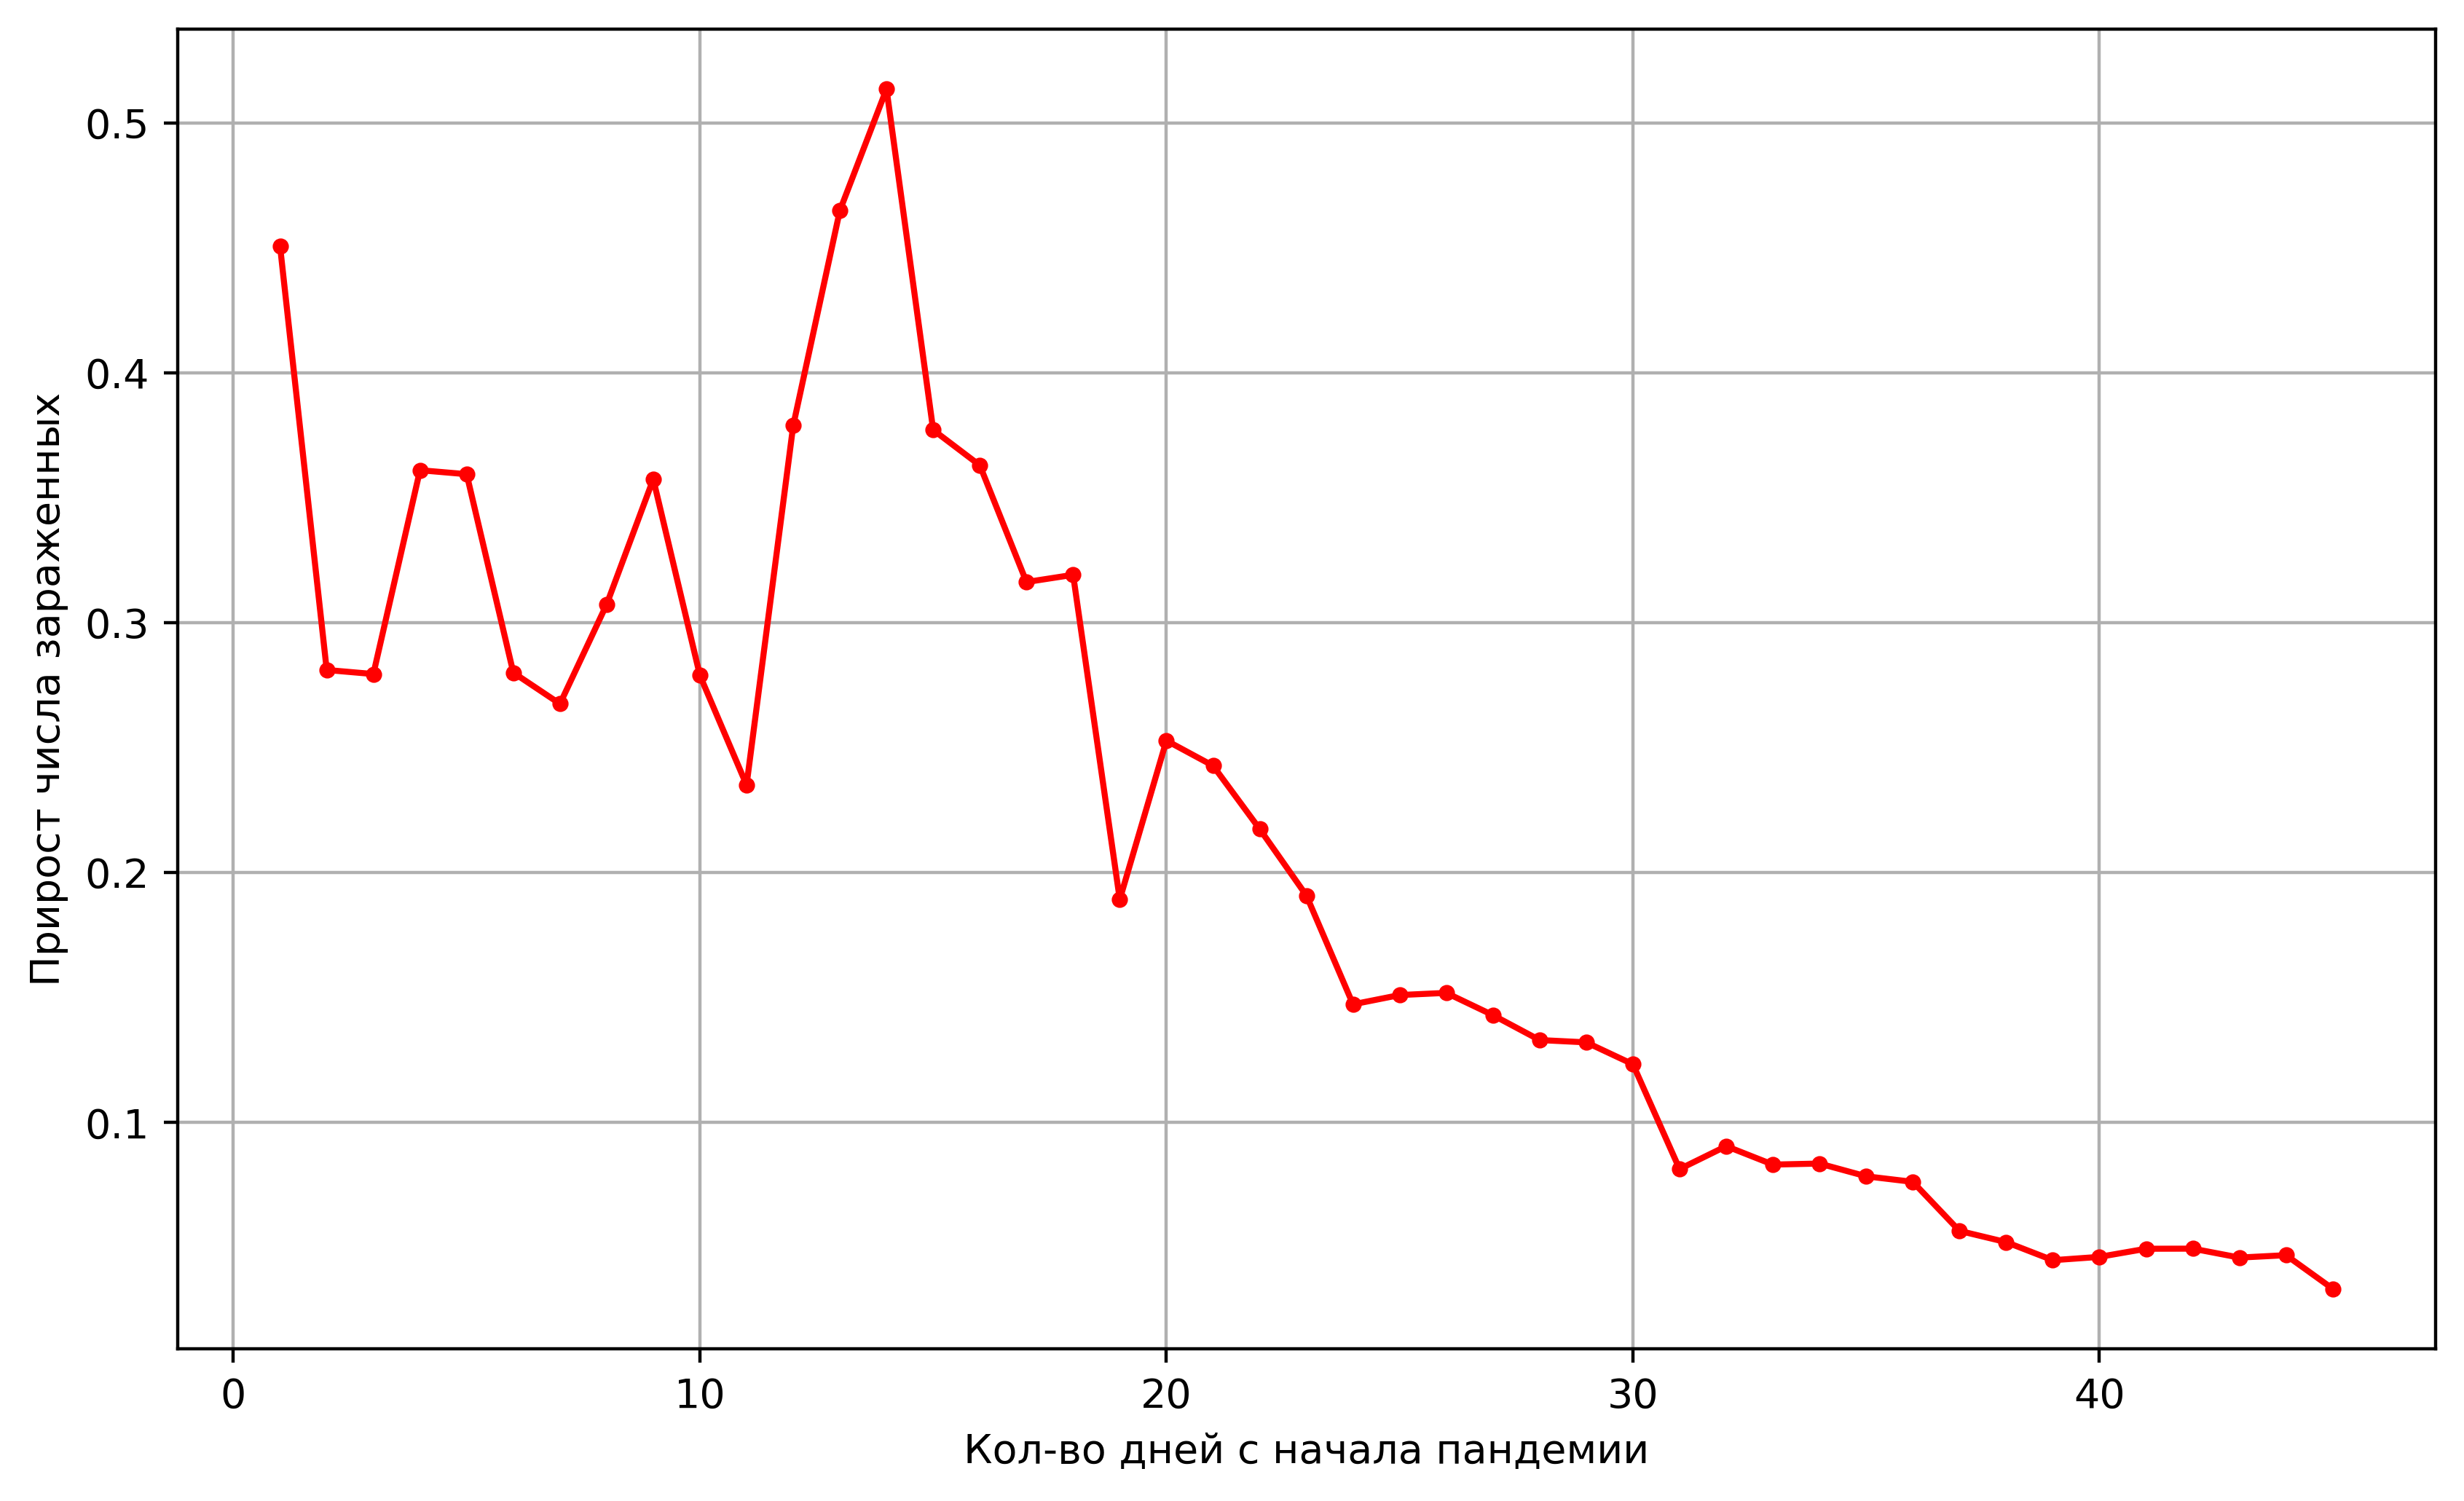

In [192]:
import pandas as pd


t = np.arange(1, frame.total_cases.size, 1)

import matplotlib.pyplot as plot
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)
plt.plot(t, [(frame.total_cases[i+1] - frame.total_cases[i]) / frame.total_cases[i] \
             for i in range( frame.total_cases.size-1)], 'r.-')
axes.set_xlabel('Кол-во дней с начала пандемии')
axes.set_ylabel('Прирост числа зараженных')
axes.grid()
plot.show()

In [160]:
def pandemic_duration(I0, I_inf, Xi):
    return -np.log(0.01 / ((I_inf / I0 - 1) * (1 - 1.01 * np.exp(-Xi)))) / Xi

print('Кол-во инфицированных человек: {}'.format(int(I_inf)))
print('Окончание пандемии наступит через {} дней'.format(int(pandemic_duration(I0, I_inf, Xi))))

Кол-во инфицированных человек: 604213
Окончание пандемии наступит через 39 дней
